In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

project = "ESL_UK_2024"
features_csv_path = fr"D:\WORKSPACE\dotabet\data\top_teams\{project}\features.csv"
df = dotabet.groupby.groupby_matches_and_teams(features_csv_path) # features.csv -> features_by_matches_and_teams.csv

ModuleNotFoundError: No module named 'seaborn'

In [18]:
features = dotabet.groupby.numeric_features
target = 'win'

In [ ]:
features

In [20]:
df[target] = df[target].astype(int)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Creating the Logistic Regression model
model = LogisticRegression()

# Training the model
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy of the logistic regression classifier:", accuracy)
print("Classification report:\n", report)

Accuracy of the logistic regression classifier: 0.9762470308788599
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       178
           1       0.99      0.97      0.98       243

    accuracy                           0.98       421
   macro avg       0.97      0.98      0.98       421
weighted avg       0.98      0.98      0.98       421



C:\Users\nikit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


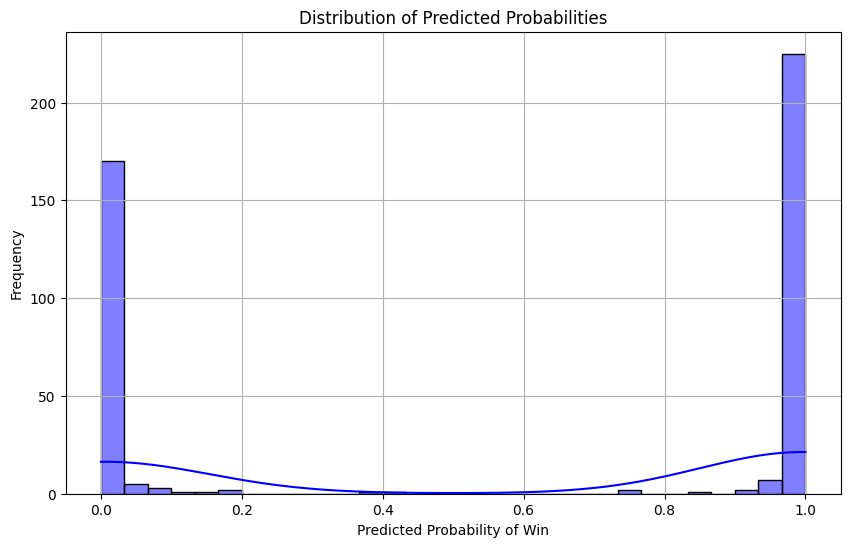

In [38]:
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities of class 1

plt.figure(figsize=(10, 6))
sns.histplot(y_proba, bins=30, kde=True, color='blue')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability of Win')
plt.ylabel('Frequency')
plt.grid(True)